<a href="https://colab.research.google.com/github/shishirsingh645/MACHINE-LEARNING/blob/main/linear%20regression%20soil%20moisture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/content/SOIL_DATA.csv')
data.head().style.background_gradient(cmap = 'Greens')

,time,latitude,longitude,clay_content,sand_content,silt_content,sm_aux,sm_tgt
0,2013-01-03,54.875000,9.125000,5.000000,86.000000,9.000000,0.454120,0.530000
1,2013-01-05,54.875000,9.125000,5.000000,86.000000,9.000000,0.437102,0.440000
2,2013-01-07,54.875000,9.125000,5.000000,86.000000,9.000000,0.412978,0.420000
3,2013-01-08,54.875000,9.125000,5.000000,86.000000,9.000000,0.378734,0.550000
4,2013-01-09,54.875000,9.125000,5.000000,86.000000,9.000000,0.350740,0.460000


In [ ]:
#perform basic check of data
size = data.size
shape = data.shape
column = data.columns
print("size",size)
print("shape",shape)
print("column",column)

size 2572672
shape (321584, 8)
column Index(['time', 'latitude', 'longitude', 'clay_content', 'sand_content',
       'silt_content', 'sm_aux', 'sm_tgt'],
      dtype='object')


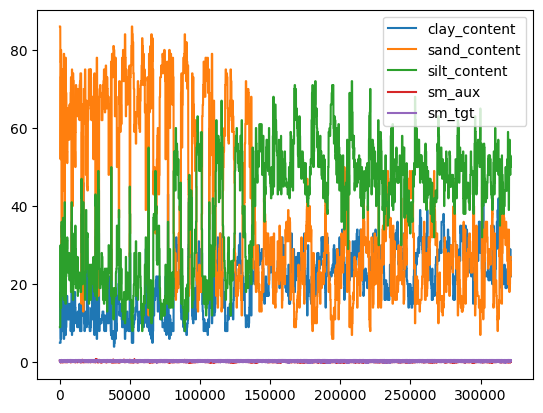

In [ ]:

import matplotlib.pyplot as plt

selected_data = data[['clay_content', 'sand_content', 'silt_content', 'sm_aux', 'sm_tgt']]

# graph
selected_data.plot()
plt.show()

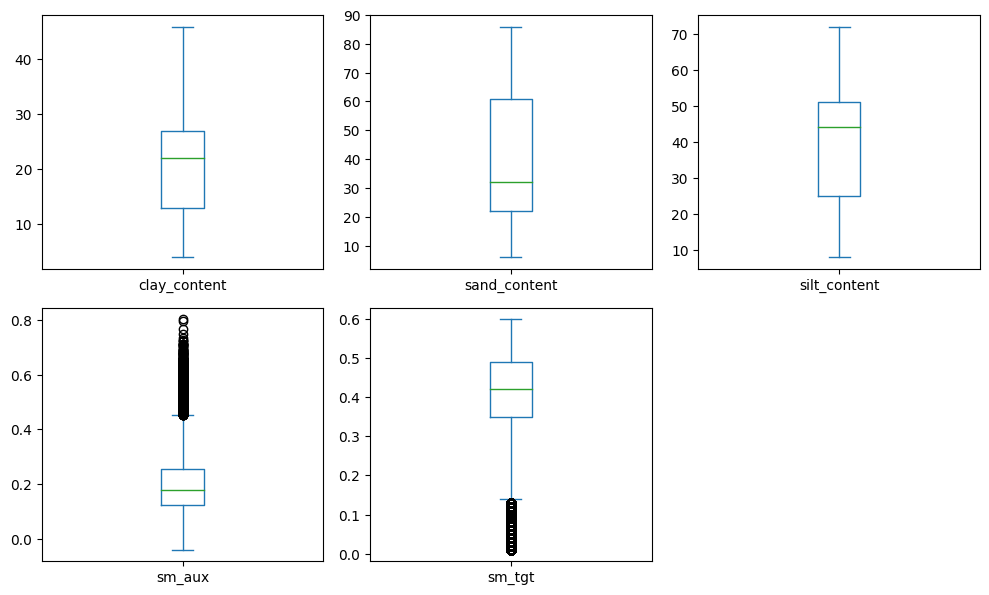

In [ ]:

selected_data[['clay_content', 'sand_content', 'silt_content', 'sm_aux', 'sm_tgt']].plot(kind='box', subplots=True, layout=(2,3), figsize=(10, 6))
plt.tight_layout()
plt.show()


In [ ]:


# Calculate the IQR for each column
Q1 = selected_data.quantile(0.25)
Q3 = selected_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
selected_data_no_outliers = selected_data[
    ~((selected_data < lower_bound) | (selected_data > upper_bound)).any(axis=1)
]


In [ ]:

X = selected_data_no_outliers[['clay_content', 'sand_content', 'silt_content', 'sm_aux']] #these parameters influence soil moisture
y = selected_data_no_outliers['sm_tgt'] #selected thisa as a target variable to calculate soil moisture


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


performing linear regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0.46225147, 0.41223376, 0.40615444, ..., 0.37362326, 0.4119477 ,
       0.4505314 ])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R2 Score: {r2}')


Mean Squared Error (MSE): 0.009350120817503988
Mean Absolute Error (MAE): 0.07824062766099711
R2 Score: 0.06781116164136392


In [ ]:

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df['Longitude'] = data['longitude'].iloc[y_test.index]
results_df['Latitude'] = data['latitude'].iloc[y_test.index]

print(results_df)


        Actual  Predicted  Longitude  Latitude
121919    0.55   0.462251      4.875    51.375
134539    0.52   0.412234     15.375    51.375
90026     0.32   0.406154     14.625    52.125
92324     0.37   0.405245      5.125    51.875
8947      0.50   0.471470      9.375    53.625
...        ...        ...        ...       ...
49136     0.31   0.393719     15.375    52.875
225864    0.39   0.413372      7.125    49.625
319098    0.41   0.373623     12.375    48.125
231984    0.19   0.411948     12.875    49.625
272166    0.55   0.450531      5.625    48.875

[62626 rows x 4 columns]


In [ ]:


results_df.to_csv('soil_moisture_predictions.csv', index=False)


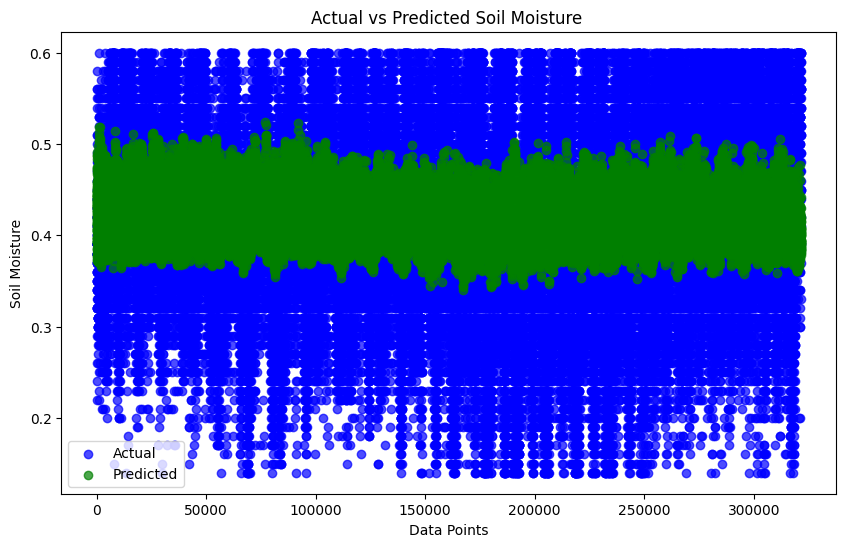

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['Actual'], color='blue', label='Actual', alpha=0.7)
plt.scatter(results_df.index, results_df['Predicted'], color='green', label='Predicted', alpha=0.7)


max_value = max(results_df['Actual'].max(), results_df['Predicted'].max())
min_value = min(results_df['Actual'].min(), results_df['Predicted'].min())

plt.xlabel('Data Points')
plt.ylabel('Soil Moisture')
plt.title('Actual vs Predicted Soil Moisture ')
plt.legend()


plt.show()


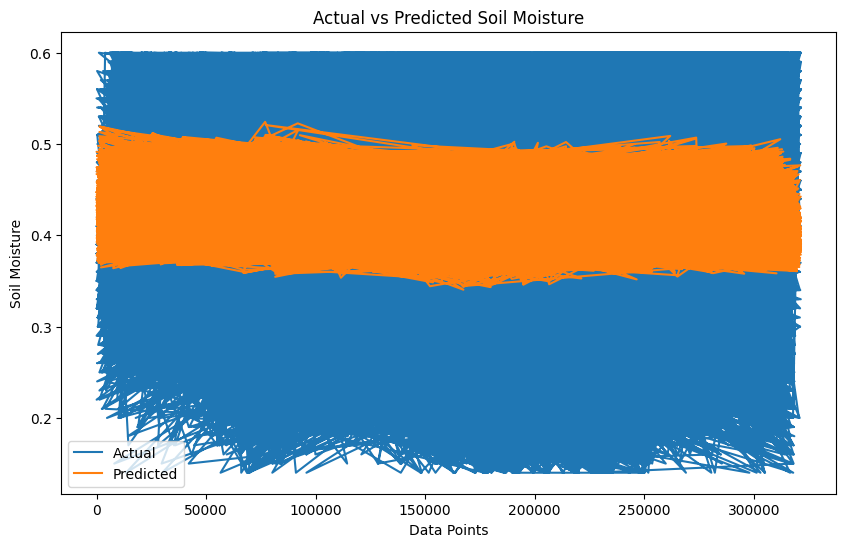

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual'], label='Actual')
plt.plot(results_df['Predicted'], label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Soil Moisture')
plt.title('Actual vs Predicted Soil Moisture')
plt.legend()
plt.show()
